<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Using Convolutional Neural Networks
* **Part 6.2: Using Pretrained Neural Networks with Keras**
* Part 6.3: Looking at Keras Generators and Image Augmentation


### Lesson Setup

Run the next code cell to load necessary packages

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
david.senseman@gmail.com


### Define functions

The cell below creates the function(s) needed for this lesson.

In [2]:
# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### **Record your specific GPU/TPU accelerator**
To faciliate grading of your homework, it is important that you specify which hardware accelerator you are using. Unfornuately, this has to be done manually since there is no other way to get this information.

In the cell below there is a Python dictionary called my_GPU_dict. Below the dictionary is the code fragment:

~~~text
# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[ ]
~~~

Before you can continue, you must place a number within the square brackets corresponding to your selected GPU or TPU. For example, if you are using the recommended A100 GPU you would enter the number 2 in the square brackets and then run the cell.

In [3]:
# Record your current Runtime GPU/TPU


# List of Current GPU/TPUs
my_GPU_dict = {
    1: 'CPU',
    2: 'A100 GPU',
    3: 'L4 GPU',
    4: 'T4 GPU',
    5: 'TPU v2-8'
}

# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[2 ]

# Print selection
print(f"My current runtime GPU/TPU is: {my_GPU}")

My current runtime GPU/TPU is: A100 GPU


If the code is correct, you should see something like the following:

~~~text
My current runtime GPU/TPU is: T4 GPU
~~~
If you don't put a number inside the square brackets, you will receive an error message.

# **Part 6.2: Transfer Learning for Computer Vision**

Many advanced prebuilt neural networks are available for computer vision, and Keras provides direct access to many networks. **_Transfer Learning_** is the technique where you use these prebuilt neural networks.

There are several different levels of transfer learning.

* Use a prebuilt neural network in its entirety
* Use a prebuilt neural network's structure
* Use a prebuilt neural network's weights

We will begin by using the **MobileNet** prebuilt neural network in its entirety. MobileNet will be loaded and allowed to classify simple images. We can already classify 1,000 images through this technique without ever having trained the network.

We begin by downloading weights for a MobileNet trained for the imagenet dataset, which will take some time to download the first time you train the network.

In [4]:
# Download Pre-Trained neural network

import tensorflow.keras
from tensorflow.keras.applications import MobileNet

model = MobileNet(weights='imagenet',include_top=True)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


If the code is correct, you should see the following output:

~~~text
Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
~~~

The loaded network is a Keras neural network. However, this is a neural network that a third party engineered on advanced hardware. Merely looking at the structure of an advanced state-of-the-art neural network can be educational.

In [5]:
# Show model structure

model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Several clues to neural network architecture become evident when examining the above structure.

**_MobileNet_** is a neural network architecture designed for mobile and embedded applications to be computationally efficient. The key components of the MobileNet architecture include depthwise separable convolutions and pointwise convolutions.
* **Depthwise separable convolutions:** MobileNet replaces traditional convolutions with depthwise separable convolutions, which consists of two separate operations: depthwise convolutions and pointwise convolutions. Depthwise convolutions apply a single filter for each input channel, while pointwise convolutions apply 1x1 convolutions to combine the outputs of depthwise convolutions.
* **Pointwise convolutions:** Pointwise convolutions are used to increase the depth of the feature maps while keeping the spatial dimensions the same. This allows for efficient learning of complex patterns while reducing the computational cost.
* **Inverted residuals with linear bottleneck:** MobileNetV2 introduces inverted residuals with linear bottleneck to improve performance. Inverted residuals use an expansion layer to increase the number of channels followed by a depthwise convolution and a projection layer to reduce the number of channels back to the original dimensions.

Overall, the MobileNet architecture is designed to be lightweight and efficient while maintaining high accuracy for a wide range of tasks, making it ideal for deployment on mobile and edge devices.

## Example 1: Use MobileNet to classify images

The code in the cell below creates a two functions that we will need to use classify images using MobileNet.

* **make_square()** Since MobileNet is designed to classify images with the same number of horizontal and vertical pixels (i.e. a 'square' image), this function uses a combination of padding and cropping to convert any image into a 'square` image.
  
* **classify_image()** This function does most of the work. It first retrives the image from the HTTPS server and resizes it before processing it by the MobileNet model that we previously downloaded. The actual prediction is made by this line of code:

~~~text
  # Use MobileNet model to predict image
  pred = model.predict(x)
~~~

We will now use the MobileNet to classify several image URLs below.  You are encourged to to add additional URLs of your own to see how well the MobileNet can classify.

In [8]:
%matplotlib inline
from PIL import Image, ImageFile, UnidentifiedImageError
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image

IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 224, 224, 3

model = MobileNet(weights='imagenet')

# Define HTTPS image source
ROOT = "https://biologicslab.co/BIO1173/images/class_06_2/"

# Function to make sample image square
def make_square(img):
    cols, rows = img.size
    pad = ((rows - cols) // 2, 0, (rows - cols) // 2, 0) if rows > cols else (0, (cols - rows) // 2, 0, (cols - rows) // 2)
    return img.crop(pad)

# Function to classify image
def classify_image(url):
    ImageFile.LOAD_TRUNCATED_IMAGES = False

    try:
        # Get image from HTTPS server
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.LANCZOS)
    except UnidentifiedImageError:
        print("Error: Cannot identify image file. Check the image URL or file format.")
        return
    except Exception as e:
        print(f"Error: {e}")
        return

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x[:, :, :, :3])  # ensure no alpha channel

    # Use MobileNet model to predict image
    preds = model.predict(x)

    # Show the image
    display(img)

    # Print out MobileNet's first 5 predictions
    for pred in decode_predictions(preds, top=5)[0]:
        print(pred)


We can now classify an example image.  You can specify the URL of any image you wish to classify.

### Example 1A: Classify images

Our MobileNet model has been trained to recognize a wide range of images. Let's try a few different types of images to get some idea of what MobileNet knows.

Let's start with a picture of Abraham Lincoln. Here is the actual image before being processed:

![___](https://biologicslab.co/BIO1173/images/class_06_2/abraham_lincoln.jpg)

Probably most US school children could correctly identify this image. You should notice that this is _not_ a square image. Let's see what happens when we process it and submit the processed image to our model?

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


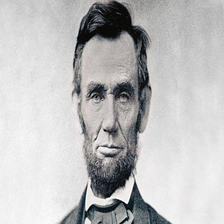

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
('n02883205', 'bow_tie', 0.93069446)
('n04350905', 'suit', 0.009225697)
('n03929855', 'pickelhaube', 0.008183778)
('n03763968', 'military_uniform', 0.0069194273)
('n02865351', 'bolo_tie', 0.0057336832)


In [9]:
# Example 1A:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

classify_image(ROOT+"abraham_lincoln.jpg")

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image01.png)

From visual inspection of the output, MobileNet concluded that there was a 93% chance that the image contained a `bow tie` and less than a 1% chance the image contained a `suit`.

Apparently, the creators of MobileNet didn't include images of American presidents in their training set. What MobileNet "saw" wasn't the Lincoln's face, but the clothes he was wearing.

We can also see what happens when our code converts a rectangular image into a square image. Lincoln's face is still clearly recognizable albeit a bit 'squashed'.

### Example 1B: Classify Images

Perhaps MobileNet only recognizes famous people who are currently alive? Let's see how MobileNet does with another former President of the US (POTUS)?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


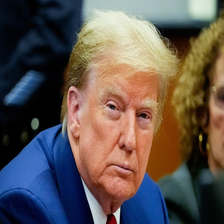

('n04296562', 'stage', 0.1594743)
('n10148035', 'groom', 0.15691401)
('n04591157', 'Windsor_tie', 0.095594235)
('n02883205', 'bow_tie', 0.08697384)
('n04350905', 'suit', 0.06901396)


In [10]:
# Example 1B:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

classify_image(ROOT+"trump.jpg")

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image02.png)

Once again, MobileNet doesn't seem to know the names of American Presidents. Rather, MobilNet tried to classify the "objects" it saw, not the people.   

### Example 1C: Classify Images

Let's try something else. How about a nice Thompson Submachine gun? This particular image is of a [Lancer Tactical Extra 50 Rounds Airsoft Magazine - Airsoft Tommy Thompson Submachine Gun (2X Drum 2X Stick)](https://us.amazon.com/Lancer-Tactical-Rounds-Airsoft-Magazine/dp/B0C24VRLM1). This airgun is sold on Amazon in case you might like to buy it.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


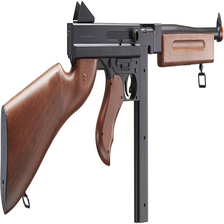

('n02749479', 'assault_rifle', 0.54274225)
('n04090263', 'rifle', 0.44097123)
('n04086273', 'revolver', 0.009973022)
('n03498962', 'hatchet', 0.0032727437)
('n03109150', 'corkscrew', 0.0010881979)


In [11]:
# Example 1C:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

classify_image(ROOT+"submachine_gun.jpg")

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image03.png)

Finally, we have one type of image that MobileNet has been trained on. MobileNet predicted that there was an approximately 54% chance that our image of a Thompson Submachine Gun was an 'assault_rife' and a 49% that the image was some kind of 'rifle'.

Technically, the Thompson Submachine Gun is _not_ considered to be an assault rife or even a rifle, but it wasn't a bad guess.

### Example 1D: Classify images

Let's see how MobileNet does with an image of an American soldier with a _real_ assault rifle, an M16.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


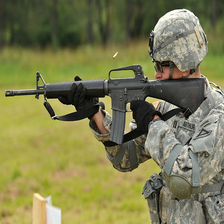

('n02749479', 'assault_rifle', 0.6522955)
('n04090263', 'rifle', 0.3475792)
('n04086273', 'revolver', 7.860302e-05)
('n03763968', 'military_uniform', 1.4319411e-05)
('n02879718', 'bow', 1.2067334e-05)


In [12]:
# Example 1D:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

classify_image(ROOT+"M16.jpg")

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image04.png)

For this image, MobileNet did pretty good. It predicted that there was an 65% chance that the image showed an assault rifle. (The M16 is considered an assult rifle). Again, MobileNet seems to ignore the inclusion of people in an image and focus on inanimate objects in the image including the presence of a `military uniform`.

## **Exercise 1: Classify images**

For **Exercise 1**, you are present our MobileNet model the following series of 8 animal images.

1. puffer_fish.jpg (Exercise 1A)
2. king_cobra.jpg (Exercise 1B)
3. monarch_butterfly.jpg (Exercise 1C)
4. viceroy_butterfly.jpg (Exercise 1D)
5. meerkat.jpg (Exercise 1E)
6. paramecium.jpg (Exercise 1F)
7. prairie_dog.jpg (Exercise 1G)
8. great-white-shark.jpg (Exercise 1H)

You will need to make a new code cell for each exercise.

If you are using COLAB, you can add a new code cell by pointing your cursor at the bottom edge of the code cell and pressing the button below:

![___](https://biologicslab.co/BIO1173/images/class_06_2_add_code.png).

If your code is correct, you should have received the following output (only the the first value is shown):

1. `puffer_fish.jpg` ('n02655020', 'puffer', 0.99882895)  Note: 99% accurate!
2. `king_cobra.jpg` ('n01748264', 'Indian_cobra', 0.999587) Note: Indian cobras are much smaller than king cobras so technically, MobileNet got this wrong. However, there is no way to know the size of the snake in the image, so we can score this as being 100% accurate.
3. `monarch_butterfly.jpg` ('n02279972', 'monarch', 0.99983335) Note: Nailed it!
4. `viceroy_butterfly.jpg` ('n02279972', 'monarch', 0.9988518) Note: Oops! A total fail, but completely understandable. MobileNet again predicted that there was 100% probability that the picture was a monarch butterfly (_Danaus plexippus_), when in fact it was a viceroy butterfly, a completely different genus and species (_Limenitis archippus_). Of course these two species look very, very similar. The viceroy and the monarch butterflies are [Müllerian mimics](https://en.wikipedia.org/wiki/M%C3%BCllerian_mimicry) of each other. It is certainly possible to train a neural network to do this for example [MonarchNet](https://ai4earthscience.github.io/neurips-2020-workshop/papers/ai4earth_neurips_2020_57.pdf). As will be shown below you could start with the MobileNet as give it additional training to differentiate images of monarchs and viceroys with a high degree of precision.
5. `meerkat.jpg` ('n02138441', 'meerkat', 0.9629027) Note: Not bad! 96% accurate.
6. `paramecium.jpg` ('n01930112', 'nematode', 0.8969467) Note: Not too close. A nematode is round worm such as the common human parasite, the pinworm (_Enterobius_). Apparently, MobileNet wasn't extensively programmed for unicelluar organisms.
7. `prairie_dog.jpg` ('n02361337', 'marmot', 0.93886554) Note: Another fail, but again understandable. [Marmots](https://en.wikipedia.org/wiki/Marmot) genus _Marmota_ are quite similar in appearance to pairie dogs, so we can give a 'pass' to MobileNet for getting these two species confused.
8. `great-white-shark.jpg` ('n01484850', 'great_white_shark', 0.9989716) Note: Nailed it! 100% correct prediction.   

### MobileNet Summary

Overall, our MobileNet neural network did quite well, as long as you picked one of the 1000 image types it supports. For many applications, MobileNet might be entirely acceptable as an image classifier.

However, if you need to classify very specialized images, like monarch vs viceroy butterflies, or marmots vs prairie dogs --image types supported by imagenet--it is necessary to use **_transfer learning_**.


--------------------------------

## **ResNet vs MobileNet**

MobileNet and ResNet are both popular deep learning architectures, but they have some key differences:

* **Architecture:** MobileNet uses depthwise separable convolutions, which consist of depthwise convolutions and pointwise convolutions, to reduce the computational cost and make the model more efficient for mobile and embedded applications. ResNet, on the other hand, uses residual blocks with skip connections to learn residual mappings for easier training of deep networks.
* **Model size:** MobileNet is known for its lightweight and compact design, making it easy to deploy on mobile devices with limited computational resources. In contrast, ResNet is a deeper network with more parameters, which can lead to higher accuracy but also requires more computational resources.
* **Training complexity:** ResNet can be easier to train compared to MobileNet, especially for deeper architectures, due to the use of skip connections that help with gradient flow and alleviate the vanishing gradient problem.
* **Performance:** ResNet is often used for tasks that require high accuracy, such as image classification on large datasets like ImageNet. MobileNet is designed for efficiency and speed, making it suitable for real-time applications on mobile devices.

Overall, the choice between MobileNet and ResNet depends on the specific requirements of the application, such as computational resources, accuracy goals, and deployment constraints.

----------------------------

## **Example 2: Use ResNet for Regression CNN**

For Example 2 we are going to use ResNet as a basis for building a CNN that can count the number of paperclips in an image. We will provide an image and expect the neural network to count items in that image. We will use a dataset created by Jeff Heaton that contains a random number of paperclips.

Here are four sample images from the 25,000 images in the paperclips dataset:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_paperclips.png)


Our goal will be to create a convolutional neural network (CNN) that can count the number of paperclips in an image. To put in a more ecological or biomedical context, a similar neural network could also be trained to count the number of giant Saguaro cacti (_Carnegiea gigantea_) in an image of the Sonoran Desert, or the number of leucocytes in a blood smear from a patient with symptoms of AML (Acute myeloid leukemia).


Although paperclips are not biomedically relevant items to count, the code shown below could used to count

### **Example 2 - Step 1: Set ENVIRONMENTAL VARIABLES**

The code in the cell below defines a number of ENVIRONMENTAL VARIABLES that are needed for latter code cells.

In [13]:
# Example 2 - Step 1: Set ENVIRONMENTAL VARIABLES

import os

URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"paperclips.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

PATH = "/content"
EXTRACT_TARGET = os.path.join(PATH,"clips")
SOURCE = os.path.join(EXTRACT_TARGET, "paperclips")

print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/paperclips.zip
DOWNLOAD_NAME= paperclips.zip
ENVIRONMENTAL VARIABLES were successfully created.


If your code is correct, you should see the following output:
~~~text
DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/paperclips.zip
DOWNLOAD_NAME= paperclips.zip
ENVIRONMENTAL VARIABLES were successfully created.
~~~

### **Example 2 - Step 2: Download and Extract Image Data**

The code in the cell below downloads a zip file from the course HTTPS server, `https://biologicslab.co/BIO1173/data`, called `paperclips.zip`. The code then extracts (unzips) data in the zip file into a new folder called `/clips`.

In [14]:
# Example 2 - Step 2: Download and Extract Data

import os

print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

print("Downloading files...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)

# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
print("done.")

print("Extracting files...", end='')
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
print("done.")

Creating necessary directories...done.
Extracting files...done.


 If your code is correct, you should see something similar to the following output:

~~~text
Creating necessary directories...done.
Downloading files...done.
Extracting files...done.
~~~

### **Example 2 - Step 3: Load the Labels for the Training Set**

The labels are contained in a CSV file named **train.csv** for the regression. This file has just two labels, **id** and **clip_count**. The ID specifies the filename; for example, row id 1 corresponds to the file **clips-1.jpg**. The following code loads the labels for the training set and creates a new column, named **filename**, that contains the filename of each image, based on the **id** column.

In [15]:
# Example 2 - Step 3: Load the Labels for the Training Set


import pandas as pd

# Read the label file
df = pd.read_csv(
        os.path.join(SOURCE,"train.csv"),
        na_values=['NA', '?'])

# Convert
df['filename']="clips-"+df["id"].astype(str)+".jpg"

# Print out df
df


,id,clip_count,filename
0,30001,11,clips-30001.jpg
1,30002,2,clips-30002.jpg
2,30003,26,clips-30003.jpg
3,30004,41,clips-30004.jpg
4,30005,49,clips-30005.jpg
...,...,...,...
19995,49996,35,clips-49996.jpg
19996,49997,54,clips-49997.jpg
19997,49998,72,clips-49998.jpg
19998,49999,24,clips-49999.jpg


This results in the following dataframe.

If your code is correct you should see the following table:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_df.png)



### **Example 2 = Step 4: Split images into training and validation sets**

The code in the cell below, splits the paperclips images into a training set and a validation set, with 90% of the images going into the training set. The number images in both sets is printed out.

In [16]:
# Split images into training and validation sets

# create dataframes to data
df_train = pd.read_csv(os.path.join(SOURCE, "train.csv"))
df_train['filename'] = "clips-" + df_train.id.astype(str) + ".jpg"

TRAIN_PCT = 0.9
TRAIN_CUT = int(len(df_train) * TRAIN_PCT)

df_train_cut = df_train[0:TRAIN_CUT]
df_validate_cut = df_train[TRAIN_CUT:]

print(f"Training size: {len(df_train_cut)}")
print(f"Validate size: {len(df_validate_cut)}")

Training size: 18000
Validate size: 2000


If your code is correct, you should see the following output:
~~~text
Training size: 18000
Validate size: 2000
~~~
We want to use early stopping. To do this, we need a validation set. We will break the data into 90% test data and 10% validation.


## Transfer Learning using `ResNet`

For **Example 2** we will make use of the structure of the **ResNet** neural network. However, there are several significant changes that we will make to ResNet to apply to this task.

First, ResNet is a classifier. However, we wish to perform a regression to count. Secondly, we want to change the image resolution that ResNet uses. Since the synaptic weights that comes with ResNet are designed to work with a different image resolution, we can't use these weights, so we won't import them. However, this means we will need to retrain the network.

### **Example 2 - Step 5: Create Image Generators**

Next, we create the generators that will provide the images to the neural network during training.

A Keras Image Generator, specifically `ImageDataGenerator`, is a powerful tool for creating batches of image data in real-time with optional data augmentation. This means it can apply random transformations like rotations, shifts, flips, and more, to your images while feeding them to your model, thus enhancing the diversity of your training data and helping prevent overfitting.

In short, it automates the flow of image data from directories and applies transformations on-the-fly. It's especially useful for handling large datasets and implementing data augmentation effortlessly.

In the cell below, we normalize the images so that the RGB colors between 0-255 become ratios between 0 and 1. We also use the **flow_from_dataframe** generator to connect the Pandas dataframe to the actual image files. We see here a straightforward implementation; you might also wish to use some of the image transformations provided by the data generator.

The **HEIGHT** and **WIDTH** constants specify the dimensions to which the image will be scaled (or expanded). It is probably not a good idea to expand the images.

#### **Install Keras Image Generator**

The Keras function `ImageDataGenerator` is part of the Keras package `keras_preprocessing` which needs to be installed by running the next code cell.

In [17]:
# Install Keras package

!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


If the code is correct, you should see the following output:

~~~text
Collecting keras_preprocessing
  Downloading Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
Requirement already satisfied: numpy>=1.9.1 in /usr/local/lib/python3.10/dist-packages (from keras_preprocessing) (1.26.4)
Requirement already satisfied: six>=1.9.0 in /usr/local/lib/python3.10/dist-packages (from keras_preprocessing) (1.16.0)
Downloading Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
Installing collected packages: keras_preprocessing
Successfully installed keras_preprocessing-1.1.2
~~~

Now that correct packages have been loaded, we can create our image generators.

In [18]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

WIDTH = 256
HEIGHT = 256
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_VAL = 256

training_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=True,
  #vertical_flip=True,
  fill_mode='nearest')

train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train_cut,
        directory=SOURCE,
        x_col="filename",
        y_col="clip_count",
        target_size=(HEIGHT, WIDTH),
        # Keeping the training batch size small
        # USUALLY increases performance
        batch_size=BATCH_SIZE_TRAIN,
        class_mode='raw')

validation_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate_cut,
        directory=SOURCE,
        x_col="filename",
        y_col="clip_count",
        target_size=(HEIGHT, WIDTH),
        # Make the validation batch size as large as you
        # have memory for
        batch_size=BATCH_SIZE_VAL,
        class_mode='raw')

Found 18000 validated image filenames.
Found 2000 validated image filenames.


If your code is correct, you should see the following output:
~~~text
Found 18000 validated image filenames.
Found 2000 validated image filenames.
~~~
This means that our train and validation generator are working properly and they know where to find the images of paperclips.

# **Transfer Learning with ResNet**

We will now use a ResNet neural network as a basis for our neural network. We will redefine both the input shape and output of the ResNet model, so we will not transfer the weights. Since we redefine the input, the weights are of minimal value.

We begin by loading, from Keras, the `ResNet50 network`. We specify **include_top** as `False` because we will change the input resolution. We also specify **weights** as `False` because we must retrain the network after changing the top input layers.

### **Example 2 - Step 6: Redefine the input shape**

The first modification of the base ResNet model `ResNet50` that we need to make is to redefine the image shape to 256 X 256 pixels.

In [19]:
# Example 2 - Step 6: Redefine the input shape

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input

# Set variables
HEIGHT = 256
WIDTH = 256

input_tensor = Input(shape=(HEIGHT, WIDTH, 3))

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

### **Example 2 - Step 7: Add Layers to Convert Model to Regression**

Now we must add a few layers to the end of the neural network so that it becomes a regression model. As you should expect for a regression model, there is only a single neuron in the output layer:
~~~text
model=Model(inputs=base_model.input,outputs=Dense(1)(x))
~~~

In [20]:
# Example 2 - Step 7:Add layers to convert model to regression

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
model=Model(inputs=base_model.input,outputs=Dense(1)(x))


### **Example 2 - Step 8: Train the Model**

In the cell below, we provide **additional** training to the base `ResNet50` model by "showing it" 16200 test images with their labels (i.e. how many paperclips are in the image) using a 1800 validation image set to allow us to have EarlyStopping.

Training is like before. However, we do not define the entire neural network here.

In [21]:
# Example 2 - Step 8: Train the Model

import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

# Set variables
EPOCHS = 100
PATIENCE = 20
BATCH_SIZE_TRAIN = train_generator.batch_size
BATCH_SIZE_VAL = val_generator.batch_size
STEP_SIZE_VALID = val_generator.n // BATCH_SIZE_VAL

start_time = time.time()

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=[RootMeanSquaredError(name="rmse")])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        patience=PATIENCE, verbose=1, mode='auto',
                        restore_best_weights=True)

print(f"-- Training is starting for {EPOCHS} epochs, batch size train: {BATCH_SIZE_TRAIN}, batch size val: {BATCH_SIZE_VAL}, runtime GPU/TPU: {my_GPU} ----------")

history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=250,
                    validation_data=val_generator, callbacks=[monitor],
                    verbose=1, validation_steps=STEP_SIZE_VALID)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time // 3600}:{(elapsed_time % 3600) // 60}:{elapsed_time % 60:.2f}")


-- Training is starting for 100 epochs, batch size train: 32, batch size val: 256, runtime GPU/TPU: A100 GPU ----------
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - loss: 176.1904 - rmse: 12.0828 - val_loss: 1844.4869 - val_rmse: 42.9475
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 218ms/step - loss: 43.7267 - rmse: 6.5648 - val_loss: 932.5010 - val_rmse: 30.5369
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 22.1695 - rmse: 4.6893 - val_loss: 606.9870 - val_rmse: 24.6371
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 18.7001 - rmse: 4.3009 - val_loss: 424.2565 - val_rmse: 20.5975
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 16.7782 - rmse: 4.0923 - val_loss: 898.6823 - val_rmse: 29.9780
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 14.1679 - rmse: 3.7573 - val_loss: 240.4489 - val_rmse: 15.5064
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - loss: 16.8568 - rmse: 4.0998 - val_loss: 339.0330 - val_rmse: 18.4128
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 18.4713 - rmse: 4.2788 - val_loss: 789.3701 - val_rmse: 28.0957
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 9.4915 - rmse: 3.0715 - val_loss: 8.5817 - val_rmse: 2.9295
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - loss: 8.5938 - rmse: 2.8994 - val_loss: 654.1793 - val_rmse: 25.5769
Epo

If `EarlyStopping` doesn't kick in, training may require a significant amount of time to complete all 100 epochs.

Here is the final output on COLAB using the `A100 GPU`:

~~~text
Epoch 29/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - loss: 3.9306 - rmse: 1.9802 - val_loss: 1367.8900 - val_rmse: 36.9850
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 9.
Elapsed time: 0.0:8.0:24.76
~~~

If we wanted to,  we could zip-up the preprocessed files and store them somewhere for later use if we needed a trained neural neural network to count the number of paperclips on a piece of paper.


In [22]:
# Save the model

from keras.models import save_model
import os

# Save path is the current directory
save_path = "."

# Save the model in the native Keras format
model.save('ResNetModel.keras')

# Print out the files in current directory
files = os.listdir()
print(files)

['.config', 'ResNetModel.keras', 'drive', 'clips', 'paperclips.zip', 'sample_data']


### **Download Trained ResNet model to your home computer**

The cell above saved the trained model as `ResNetModel.keras` to your current Colab directory. When you terminate this lesson, your `runtime` will be deleted which means all of your files will be lost. If you wanted to use the trained ResNet model later, you can download it to your laptop (or desktop) by uncommenting the line below that reads:

~~~text
#files.download('ResNetModel.keras')
~~~

This will start the download process. The file `ResNetModel.keras` is about 314KB in size, so downloading it to your computer will take several minutes depending upon your Internet speed.

In [20]:
from google.colab import files

#files.download('ResNetModel.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Example 2 - Step 9: Plot `rmse` and `val_rmse`**

The code in the cell below plot's the `rmse` and `val_rmse` recorded during each epoch in the training cycle. As you can see, `rmse` and `val_rmse` decrease during training as model adjusts its synaptic weights to improve its regression precision after each epoch.

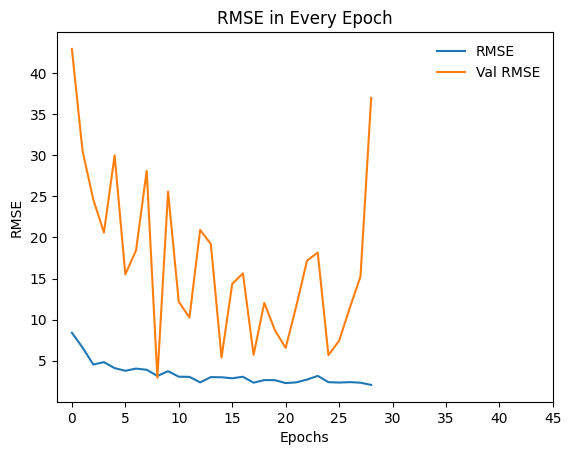

In [23]:
# Example 2 - Step 9: Plot rmse and val_rmse

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.legend(['RMSE', 'Val RMSE'], frameon=False)
plt.xticks(np.arange(0, 50, 5))

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE in Every Epoch')
plt.show()


If the code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image05.png)

### **Example - Step 10: Display an Image from the Test Set**

The code in the next cell picks a random paperclip image from the training set and prints out with the actual number of paperclips in the image shown in the title.


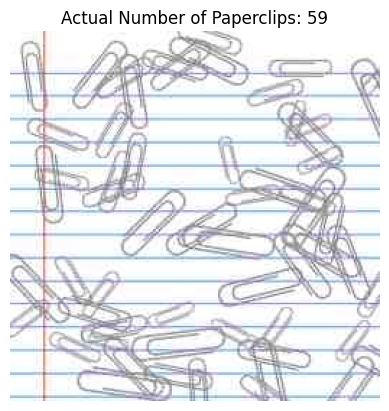

In [24]:
# Example - Step 10: Display an Image from the Test Set

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
batch = next(train_generator)
images, labels = batch

# Display the first image in the batch
plt.imshow(images[0])
plt.title(f"Actual Number of Paperclips: {labels[0]}")
actual_num_paperclips = labels[0]
plt.axis('off')
plt.show()

# Save the image without the title
fig, ax = plt.subplots()
ax.imshow(images[0])
ax.axis('off')
fig.savefig('saved_image.png', bbox_inches='tight', pad_inches=0)
plt.close(fig)


If the code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image06.png)

### **Example 2 - Step 11: Count Paperclips with ResNet Model**

The code in the next cell submits the image about (without a title) to our modified ResNet model that we trained in **Example 2 - Step 8** using a custom function called `load_and_preprocess_image()`:

~~~text
# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale if you trained with rescaled images
    return img_array
~~~

Once the image has been processed, it is submitted (without a title) to our modified ResNet model with this code chunk:

~~~text
# Predict the number of objects
prediction = model.predict(img_array)
predicted_count = np.round(prediction[0][0])
~~~

which generates a prediction as to number of paperclips it "sees" in the image. The code then prints out the image again, but this time with the number of paperclips the models thinks it sees in the title.

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


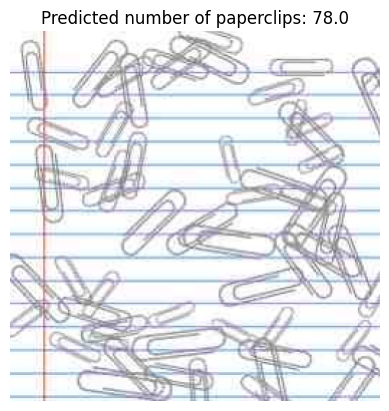

The actual number of paperclips:59


In [25]:
# Example 2 - Step 11: Count Paperclips with ResNet Model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale if you trained with rescaled images
    return img_array

# Path to your image
img_path = 'saved_image.png'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path, target_size=(256, 256))

# Predict the number of objects
prediction = model.predict(img_array)
predicted_count = np.round(prediction[0][0])

# Display the image and the prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted number of paperclips: {predicted_count}")
plt.axis('off')
plt.show()

print(f"The actual number of paperclips:{actual_num_paperclips}")


If the code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image07.png)

Since image selection is randomized, you won't see the same images as shown about. Unless your image has a very low number of paperclips in it, you will see that the number of paperclips predicted by the model is not exactly the same as the actual number. For the image shown above, the actual number of paperclips in the image is `59` which our model predicted the number was `78`. In this paricular instance, the model is off by ~30%.  

## **Lesson Turn-in**

When you have completed all of the code cells, and run them in sequential order (the last code cell should be number 32) use the **File --> Print.. --> Save to PDF** to generate a PDF of your JupyterLab notebook. Save your PDF as `Class_06_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.